In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import *

# Simple Model

In [2]:
def chi(): 
    return g**2 / (delta * (delta + A)) * A

In [62]:
chi1 = 200 * 1e-6 # in units of Ghz
chi2 = 240 * 1e-6

alpha1 = 10 
alpha2 = 10

del_c1 = 10 * 1e-3  # Cavity drive detunings 
del_c2 = 10 * 1e-3

g12 = np.sqrt(chi1 * chi2) / 4 # cross kerr

In [63]:
g12

5.477225575051661e-05

In [64]:
chi1 * alpha1

0.002

## Hamiltonian

$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Omega_q \sigma_z/2 + \chi_i \alpha_i(a_i^\dagger \sigma^- + h.c.)/2 + g_{12} (a_1^\dagger a_2 + h.c.)$$

In [65]:
def Ham(Omega_q):
    '''
    Hamiltonian
    '''
    H = np.array([[del_c1 , chi1 * alpha1 /2, g12], 
            [chi1 * alpha1 /2, Omega_q /2, chi2 * alpha2 /2], 
            [g12, chi2 * alpha2 /2, del_c2]])
    return H 


In [66]:
def eig(H): 
    '''
    Diagonalize Hamiltonian and return eigenvalues
    '''
    w= linalg.eigvals(H)
    return w

In [67]:
Omegaqs = np.linspace(0.01, 4, 1000) * del_c1
eigvals = []

for om in Omegaqs: 
    H = Ham(om)
    w = eig(H)
    eigvals.append(w)
    
eigvals = np.array(eigvals)
eigvalsT = eigvals.T

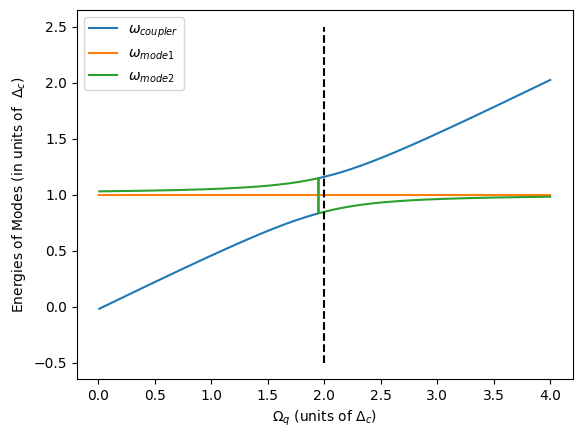

In [68]:
# plot data 

labels = ['$\omega_{coupler}$', '$\omega_{mode 1}$', '$\omega_{mode 2}$']

for idx in range(len(eigvalsT)): 
    plt.plot(Omegaqs / (del_c1), eigvalsT[idx] /(del_c2), linestyle = '-', marker = '', label = labels[idx])

plt.vlines([2.00], ymin = -0.5, ymax = 2.5, color = 'k', linestyle = '--')
plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Energies of Modes (in units of  $\Delta_c$)')
plt.legend()
plt.show()

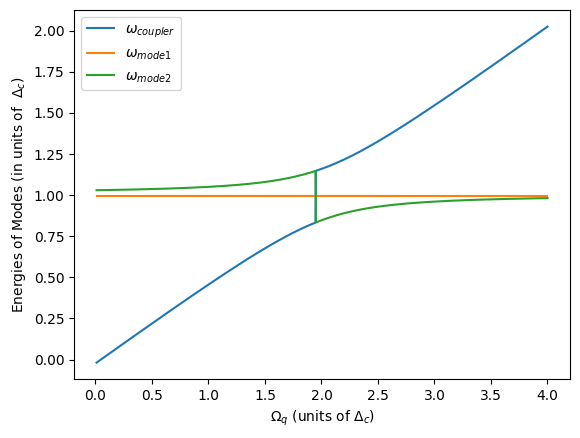

In [69]:
labels = ['$\omega_{coupler}$', '$\omega_{mode 1}$', '$\omega_{mode 2}$']

for idx in range(len(eigvalsT)): 
    plt.plot(Omegaqs / (del_c1), eigvalsT[idx] /(del_c2), linestyle = '-', marker = '', label = labels[idx])

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Energies of Modes (in units of  $\Delta_c$)')
plt.legend()
plt.show()

## Interpretation

1. There is an avoided crossing when the coupler transmon frequency becomes equal to that of the modes. At the crossing, the separation is proptional to $2g = \chi\alpha$

## Beamsplitter rate from Schrieffer Wolff Transformation

$$g_{SW} =  \frac{g_1  g_2}{2}  (\frac{1}{\delta_1} + \frac{1}{\delta_2} - \frac{1}{\Sigma_1}  - \frac{1}{\Sigma_2})$$
where
$$g_1 = \chi_1 \alpha_1/4 $$
$$\delta_1 = \Delta_{c,1} - \Omega_q$$
$$\Sigma_1 = \Delta_{c,1} + \Omega_q$$

In [70]:
def g_sw(Omega_q): 
    '''
    Rate from Schrieffer wolff transformation
    '''
    g1 = chi1 * alpha1 / 4
    g2 = chi2 * alpha2  / 4
    
    del1 = del_c1 - Omega_q
    sum1 = del_c1 + Omega_q
    
    del2 = del_c2 - Omega_q
    sum2 = del_c2 + Omega_q
    
    return  g1 * g2 * (1/del1 + 1/del2 - 1/sum1 - 1/sum2)

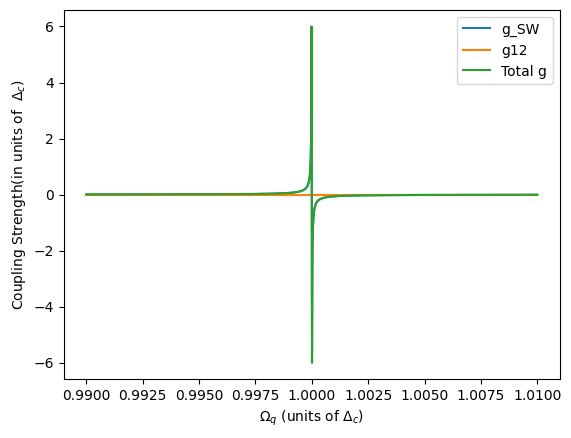

In [71]:
Omegaqs = np.linspace(0.99, 1.01, 1000) * del_c1
gs_sw = g_sw(Omegaqs)

g12s = [g12 for i in range(len(Omegaqs))]

plt.plot(Omegaqs/del_c1, gs_sw, label = 'g_SW')
plt.plot(Omegaqs/del_c1, g12s, label = 'g12')
plt.plot(Omegaqs/del_c1, (gs_sw + g12s), label = 'Total g')

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Coupling Strength(in units of  $\Delta_c$)')
#plt.yscale('log')
#plt.axis([ 1.00,  1.01, -1, 1])
plt.legend()
plt.show()

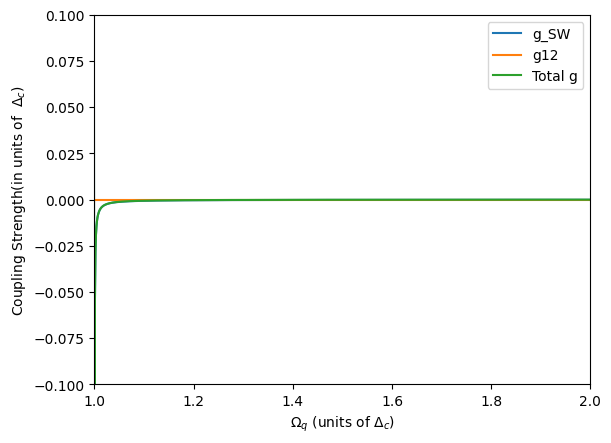

In [72]:
Omegaqs = np.linspace(0.99, 2, 1000) * del_c1
gs_sw = g_sw(Omegaqs)

g12s = [g12 for i in range(len(Omegaqs))]

plt.plot(Omegaqs/del_c1, gs_sw, label = 'g_SW')
plt.plot(Omegaqs/del_c1, g12s, label = 'g12')
plt.plot(Omegaqs/del_c1, (gs_sw + g12s), label = 'Total g')

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Coupling Strength(in units of  $\Delta_c$)')
#plt.yscale('log')
plt.axis([ 1.00,  2, -.1, .1])
plt.legend()
plt.show()